In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")
os.chdir("/Users/metinvs/Downloads")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/metinvs/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/metinvs/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/metinvs/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/metinvs/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
 

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/metinvs/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/metinvs/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/metinvs/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/metinvs/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
 

AttributeError: _ARRAY_API not found

In [3]:
data = pd.read_csv('Enhanced_Time_Series_Dataset.csv', sep=',')
print(data.shape)

(730, 4)


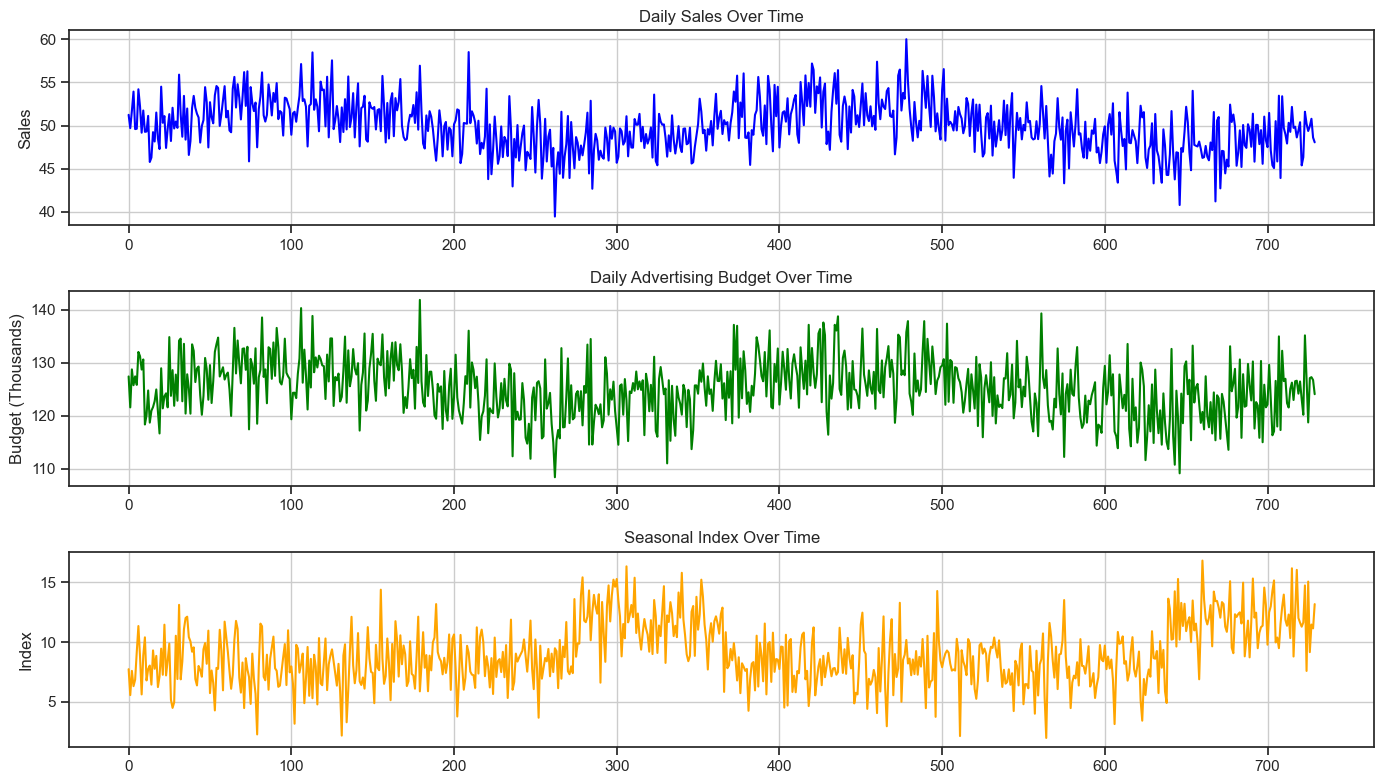

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Sales
plt.subplot(3, 1, 1)
plt.plot(data.index, data["Sales"], label="Sales", color="blue")
plt.title("Daily Sales Over Time")
plt.ylabel("Sales")
plt.grid()

# Advertising Budget
plt.subplot(3, 1, 2)
plt.plot(data.index, data["AdvertisingBudget"], label="Advertising Budget", color="green")
plt.title("Daily Advertising Budget Over Time")
plt.ylabel("Budget (Thousands)")
plt.grid()

# Seasonal Index
plt.subplot(3, 1, 3)
plt.plot(data.index, data["SeasonalIndex"], label="Seasonal Index", color="orange")
plt.title("Seasonal Index Over Time")
plt.ylabel("Index")
plt.grid()

plt.tight_layout()
plt.show()

In [5]:
#Model Compharising
import statsmodels.api as sm
import numpy as np

# Add log-transformed variables
data['LogSales'] = np.log(data['Sales'])
data['LogAdvertisingBudget'] = np.log(data['AdvertisingBudget'])
data['LogSeasonalIndex'] = np.log(data['SeasonalIndex'])

# Linear-linear model
lin_lin_model = sm.OLS(data["Sales"], sm.add_constant(data[["AdvertisingBudget", "SeasonalIndex"]])).fit()

# Log-log model
log_log_model = sm.OLS(data["LogSales"], sm.add_constant(data[["LogAdvertisingBudget", "LogSeasonalIndex"]])).fit()

# Log-linear model
log_lin_model = sm.OLS(data["LogSales"], sm.add_constant(data[["AdvertisingBudget", "SeasonalIndex"]])).fit()

# Print summaries
print("Linear-Linear Model:\n", lin_lin_model.summary())
print("\nLog-Log Model:\n", log_log_model.summary())
print("\nLog-Linear Model:\n", log_lin_model.summary())

Linear-Linear Model:
                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     953.1
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          6.58e-204
Time:                        17:48:17   Log-Likelihood:                -1361.6
No. Observations:                 730   AIC:                             2729.
Df Residuals:                     727   BIC:                             2743.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const           

In [6]:
## Unit Root Test
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(data['Sales'])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

if adf_test[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

ADF Statistic: -2.4770658393629814
p-value: 0.12115463350588546
The series is non-stationary.


In [27]:
### Multicoliniariity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['AdvertisingBudget', 'SeasonalIndex']]
X = sm.add_constant(X)

vif = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif)

            Variable         VIF
0              const  560.423021
1  AdvertisingBudget    1.020610
2      SeasonalIndex    1.020610


In [34]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2

log_log_model = sm.OLS(data["LogSales"], sm.add_constant(data[["LogAdvertisingBudget", "LogSeasonalIndex"]])).fit()

beta_hat = log_log_model.params[1:]  # Exclude intercept
cov_matrix = log_log_model.cov_params().iloc[1:, 1:]  # Exclude intercept row/column
wald_stat = np.dot(np.dot(beta_hat.T, np.linalg.inv(cov_matrix)), beta_hat)  # (b_hat.T * cov^-1 * b_hat)

df = len(beta_hat)

wald_p_value = 1 - chi2.cdf(wald_stat, df)
print("Wald Test Results for Log-Log Model")
print(f"Wald Statistic: {wald_stat:.4f}")
print(f"p-value: {wald_p_value:.4f}")

Wald Test Results for Log-Log Model
Wald Statistic: 1923.2724
p-value: 0.0000
Reject H₀: At least one predictor significantly contributes to the model.
Wald Test results are embedded in the regression summaries above t-values and p-values.


In [34]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2

log_log_model = sm.OLS(data["LogSales"], sm.add_constant(data[["LogAdvertisingBudget", "LogSeasonalIndex"]])).fit()

beta_hat = log_log_model.params[1:]  
cov_matrix = log_log_model.cov_params().iloc[1:, 1:]  
wald_stat = np.dot(np.dot(beta_hat.T, np.linalg.inv(cov_matrix)), beta_hat) 
df = len(beta_hat)

wald_p_value = 1 - chi2.cdf(wald_stat, df)
print("Wald Test Results for Log-Log Model")
print(f"Wald Statistic: {wald_stat:.4f}")
print(f"p-value: {wald_p_value:.4f}")

Wald Test Results for Log-Log Model
Wald Statistic: 1923.2724
p-value: 0.0000
Reject H₀: At least one predictor significantly contributes to the model.
Wald Test results are embedded in the regression summaries above t-values and p-values.


In [28]:
#Chow Test
from scipy.stats import chi2

split_index = len(data) // 2
data1 = data.iloc[:split_index]
data2 = data.iloc[split_index:]

model1 = sm.OLS(data1['Sales'], sm.add_constant(data1[['AdvertisingBudget', 'SeasonalIndex']])).fit()
model2 = sm.OLS(data2['Sales'], sm.add_constant(data2[['AdvertisingBudget', 'SeasonalIndex']])).fit()

log_likelihood_full = lin_lin_model.llf
log_likelihood_split = model1.llf + model2.llf

chow_stat = 2 * (log_likelihood_split - log_likelihood_full)
p_value = chi2.sf(chow_stat, df=2)

print("Chow Test Statistic:", chow_stat)
print("p-value:", p_value)

Chow Test Statistic: 2.209129915617723
p-value: 0.3313550042972348


In [30]:
#Park Test
park_model = sm.OLS(np.log(log_log_model.resid**2), sm.add_constant(data[['AdvertisingBudget', 'SeasonalIndex']])).fit()
print(park_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.564
Date:                Thu, 09 Jan 2025   Prob (F-statistic):              0.210
Time:                        18:25:50   Log-Likelihood:                -1589.8
No. Observations:                 730   AIC:                             3186.
Df Residuals:                     727   BIC:                             3199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.9003      1.87

In [31]:
#Goldfeld Test
from statsmodels.stats.diagnostic import het_goldfeldquandt

gq_stat, gq_pval, _ = het_goldfeldquandt(data['Sales'], X.iloc[:, 1:])
print("Goldfeld-Quandt Statistic:", gq_stat)
print("p-value:", gq_pval)

Goldfeld-Quandt Statistic: 1.1606048256755603
p-value: 0.07820853138311674


In [32]:
#Durbin Watson Test
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(log_log_model.resid)
print("Durbin-Watson Statistic:", dw_stat)

Durbin-Watson Statistic: 1.9091016295247056


In [19]:
# T ve P Anaf
# t-Test results are part of the regression summary
print("t-Test results are included in the regression model summary.")
print(log_log_model.summary())

# Extract specific t-values and p-values
t_values = log_log_model.tvalues
p_values = log_log_model.pvalues

print("\nT-values:")
print(t_values)

print("\nP-values:")
print(p_values)

# Interpret results
for variable, p_val in p_values.items():
    if p_val < 0.05:
        print(f"The variable '{variable}' is statistically significant (p-value: {p_val:.4f}).")
    else:
        print(f"The variable '{variable}' is not statistically significant (p-value: {p_val:.4f}).")

t-Test results are included in the regression model summary.
                            OLS Regression Results                            
Dep. Variable:               LogSales   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     961.6
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          6.33e-205
Time:                        17:58:09   Log-Likelihood:                 1493.6
No. Observations:                 730   AIC:                            -2981.
Df Residuals:                     727   BIC:                            -2967.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [15]:
# F test
# F-Test results are part of the regression summary
print("F-Test results are included in the regression model summary.")
print("F-statistic:", lin_lin_model.fvalue)
print("p-value for F-test:", lin_lin_model.f_pvalue)

F-Test results are included in the regression model summary.
F-statistic: 953.1291538098897
p-value for F-test: 6.582404155138895e-204
Reject H₀: The model is statistically significant overall.


In [20]:
import statsmodels
print(statsmodels.__version__)

0.14.4


In [17]:
pip install --upgrade statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import statsmodels.api as sm

# Örnek model oluşturma
X = sm.add_constant(X)  # Sabit terim eklenmesi
lin_lin_model = sm.OLS(y, X).fit()  # Regresyon modeli oluşturma

NameError: name 'y' is not defined

In [25]:
import statsmodels.api as sm

fitted_values = lin_lin_model.fittedvalues

data['Fitted_Squared'] = fitted_values**2
data['Fitted_Cubed'] = fitted_values**3


mvd_model = sm.OLS(data['Sales'], sm.add_constant(data[['AdvertisingBudget', 'SeasonalIndex', 'Fitted_Squared', 'Fitted_Cubed']])).fit()

restricted_model = lin_lin_model
restricted_llf = restricted_model.llf
unrestricted_llf = mvd_model.llf

num_restrictions = 2  
num_observations = len(data)
unrestricted_params = len(mvd_model.params)
restricted_params = len(restricted_model.params)

f_stat = ((unrestricted_llf - restricted_llf) / num_restrictions) / (
    (1 - unrestricted_llf) / (num_observations - unrestricted_params)
)


from scipy.stats import f

p_value = 1 - f.cdf(f_stat, num_restrictions, num_observations - unrestricted_params)

print("MacKinnon, White, Davidson (MWD) Test")
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

MacKinnon, White, Davidson (MWD) Test
F-Statistic: 0.02538268596680633
P-Value: 0.9749376123692142
Fail to reject H₀: The linear model is correctly specified.


In [26]:
import statsmodels.api as sm
from scipy.stats import f

# Fit the original linear model
log_log_model = sm.OLS(data["LogSales"], sm.add_constant(data[["LogAdvertisingBudget", "LogSeasonalIndex"]])).fit()

# Add nonlinear terms: squared and cubed fitted values
data["Fitted_Squared"] = log_log_model.fittedvalues ** 2
data["Fitted_Cubed"] = log_log_model.fittedvalues ** 3

# Fit the extended model with nonlinear terms
mwd_model = sm.OLS(data["LogSales"], sm.add_constant(data[["LogAdvertisingBudget", "LogSeasonalIndex", "Fitted_Squared", "Fitted_Cubed"]])).fit()

# Compute the F-statistic for comparing the two models
restricted_llf = log_log_model.llf  # Log-likelihood of the restricted model
unrestricted_llf = mwd_model.llf  # Log-likelihood of the unrestricted model

# Number of additional parameters in the unrestricted model
num_restrictions = 2  # Two additional terms: Fitted_Squared and Fitted_Cubed
num_observations = len(data)
unrestricted_params = len(mwd_model.params)
restricted_params = len(log_log_model.params)

# Compute the F-statistic
f_stat_mwd = ((unrestricted_llf - restricted_llf) / num_restrictions) / (
    (1 - unrestricted_llf) / (num_observations - unrestricted_params)
)

# Compute the p-value
p_value_mwd = 1 - f.cdf(f_stat_mwd, num_restrictions, num_observations - unrestricted_params)

# Display results
print("MacKinnon, White, Davidson (MWD) Test Results")
print(f"F-Statistic: {f_stat_mwd}")
print(f"P-Value: {p_value_mwd}")

# Interpretation
if p_value_mwd < 0.05:
    print("Reject H₀: The linear model is not correctly specified.")
else:
    print("Fail to reject H₀: The linear model is correctly specified.")

MacKinnon, White, Davidson (MWD) Test Results
F-Statistic: -0.006673838228054865
P-Value: 1.0
Fail to reject H₀: The linear model is correctly specified.
